In [1]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans
from sklearn import decomposition

In [3]:
X = pnd.read_csv("residentes.csv")
X.head()

,VIV_SEL,HOGAR,N_REN,PARENTESCO,SEXO,EDAD,ASISESC,NIVEL,GRADO,USOCOMPU,USOINTER,USOCEL,CONDACT,VERIACT,POSOCUP
0,1,1,1,1,1,66,2,2,6,2,2,2,1,5,3
1,1,1,2,2,2,62,2,2,6,2,2,2,6,4,6
2,1,1,3,3,1,42,2,3,3,1,1,1,1,5,1
3,1,1,4,3,1,34,2,7,3,1,1,1,1,5,1
4,2,1,1,1,1,39,2,7,3,2,2,1,1,5,3


In [4]:
X.drop('VIV_SEL',1,inplace=True)
X.drop('N_REN',1,inplace=True)

In [5]:
X = X.sample(frac=0.05, random_state=1)
X.head()

,HOGAR,PARENTESCO,SEXO,EDAD,ASISESC,NIVEL,GRADO,USOCOMPU,USOINTER,USOCEL,CONDACT,VERIACT,POSOCUP
35235,1,3,2,21,1,7,3,1,1,1,5,4,6
219356,1,3,2,32,2,2,6,2,2,1,1,5,1
425352,1,1,2,57,2,0,0,2,2,1,1,5,2
360759,1,3,1,6,1,1,3,2,1,2,9,5,6
356997,1,1,2,76,2,2,3,2,2,2,4,4,6


In [6]:
X = sk.preprocessing.normalize(X, norm='l2', axis=1, copy=True)

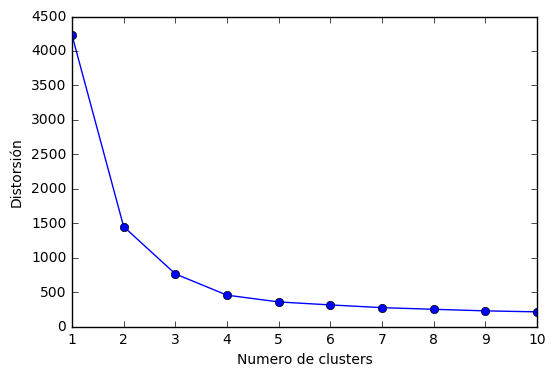

In [7]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [8]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0) 

In [9]:
y_km = clusters.fit_predict(X)
y_km

array([2, 0, 0, ..., 2, 1, 0])

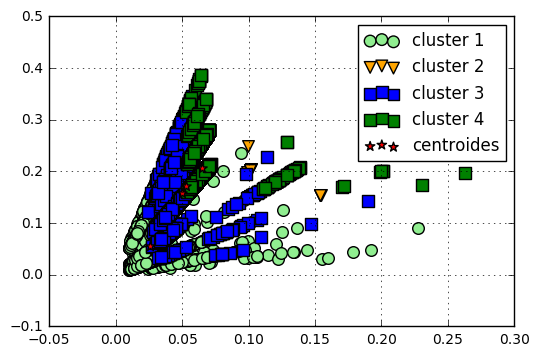

In [10]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

##### Aplicar PCA para separar mas los clusters

In [12]:
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

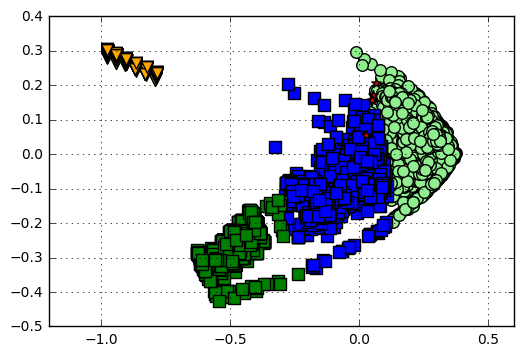

In [14]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

#plt.legend()
plt.grid()
plt.show()